In [40]:
import numpy as np
import pandas as pd


In [41]:
df=pd.read_excel(r'D:\Project\Mlproject\Data\ai_dev_assignment_tickets_complex_1000.xls')

In [42]:
df.head()

,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [43]:
df.drop('ticket_id',axis=1,inplace=True)

In [44]:
df.head()

,ticket_text,issue_type,urgency_level,product
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [45]:
df.isnull().sum()

ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64

In [46]:
df_clean = df.dropna().copy()


In [47]:
df_clean.head()

,ticket_text,issue_type,urgency_level,product
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
5,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam
6,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC


In [48]:
df_clean.isnull().sum()

ticket_text      0
issue_type       0
urgency_level    0
product          0
dtype: int64

In [49]:
df_clean.shape

(826, 4)

In [50]:

print(df_clean['urgency_level'].value_counts())

# Check normalized percentages
print(df_clean['urgency_level'].value_counts(normalize=True))


urgency_level
High      288
Medium    278
Low       260
Name: count, dtype: int64
urgency_level
High      0.348668
Medium    0.336562
Low       0.314770
Name: proportion, dtype: float64


In [51]:
df_clean.isna().sum()

ticket_text      0
issue_type       0
urgency_level    0
product          0
dtype: int64

In [52]:
df_encoded1=pd.get_dummies(df_clean,columns=['issue_type','product'])

In [53]:
df_encoded1

,ticket_text,urgency_level,issue_type_Account Access,issue_type_Billing Problem,issue_type_General Inquiry,issue_type_Installation Issue,issue_type_Late Delivery,issue_type_Product Defect,issue_type_Wrong Item,product_EcoBreeze AC,product_FitRun Treadmill,product_PhotoSnap Cam,product_PowerMax Battery,product_ProTab X1,product_RoboChef Blender,product_SmartWatch V2,product_SoundWave 300,product_UltraClean Vacuum,product_Vision LED TV
0,Payment issue for my SmartWatch V2. I was unde...,Medium,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Medium,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,Facing installation issue with PhotoSnap Cam. ...,Low,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
5,Can you tell me more about the PhotoSnap Cam w...,Medium,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6,is malfunction. It stopped working after just...,Low,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Is this item in stock?,High,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
995,I ordered EcoBreeze AC but got FitRun Treadmil...,High,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
996,I ordered SoundWave 300 but got PowerMax Batte...,Low,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
998,Payment issue fr mi SoundWave 300. I was debit...,Low,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [54]:
df_clean.head()

,ticket_text,issue_type,urgency_level,product
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
5,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam
6,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assume df has columns: ticket_id, ticket_text, issue_type, urgency_level

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[['ticket_text', 'urgency_level']], df_clean['issue_type'],
    test_size=0.2, stratify=df_clean['issue_type'], random_state=42
)

# Pipeline: TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train
pipeline.fit(X_train['ticket_text'], y_train)

# Predict
y_pred = pipeline.predict(X_test['ticket_text'])

# Evaluate
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

    Account Access       1.00      1.00      1.00        27
   Billing Problem       1.00      1.00      1.00        26
   General Inquiry       1.00      1.00      1.00        25
Installation Issue       1.00      1.00      1.00        26
     Late Delivery       1.00      1.00      1.00        19
    Product Defect       1.00      1.00      1.00        22
        Wrong Item       1.00      1.00      1.00        21

          accuracy                           1.00       166
         macro avg       1.00      1.00      1.00       166
      weighted avg       1.00      1.00      1.00       166



In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, ngram_range=(1,2)), 'ticket_text'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['urgency_level'])
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, df_clean[['ticket_text','urgency_level']], df_clean['issue_type'], cv=5, scoring='f1_macro')
print(scores, scores.mean())


[1. 1. 1. 1. 1.] 1.0


In [58]:
df_clean.columns

Index(['ticket_text', 'issue_type', 'urgency_level', 'product'], dtype='object')

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[['ticket_text', 'issue_type', 'product']], 
    df_clean['urgency_level'],
    test_size=0.2, stratify=df_clean['urgency_level'], random_state=42
)

# Preprocessor: text → TF-IDF, categorical → OneHot
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, ngram_range=(1,2)), 'ticket_text'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['issue_type', 'product'])
    ]
)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.44      0.47      0.45        58
         Low       0.28      0.23      0.25        52
      Medium       0.38      0.41      0.39        56

    accuracy                           0.37       166
   macro avg       0.36      0.37      0.37       166
weighted avg       0.37      0.37      0.37       166



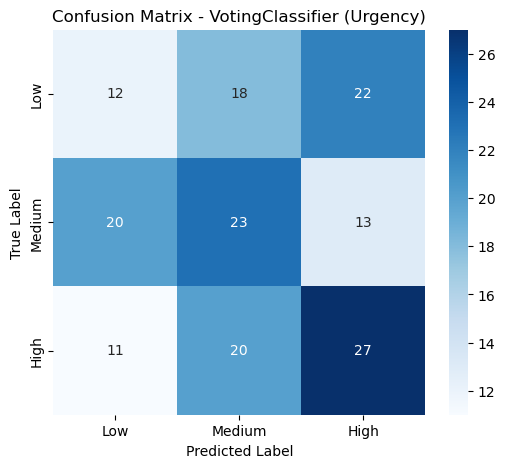

In [60]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
df_clean

,ticket_text,issue_type,urgency_level,product
0,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
2,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
5,Can you tell me more about the PhotoSnap Cam w...,General Inquiry,Medium,PhotoSnap Cam
6,is malfunction. It stopped working after just...,Product Defect,Low,EcoBreeze AC
...,...,...,...,...
994,Is this item in stock?,General Inquiry,High,RoboChef Blender
995,I ordered EcoBreeze AC but got FitRun Treadmil...,Wrong Item,High,EcoBreeze AC
996,I ordered SoundWave 300 but got PowerMax Batte...,Wrong Item,Low,SoundWave 300
998,Payment issue fr mi SoundWave 300. I was debit...,Billing Problem,Low,SoundWave 300


In [62]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. LOAD DATA
# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_file.csv')

# --- PRE-PROCESSING STEP (CRITICAL) ---
# Drop rows where 'urgency_level' is empty (like Row 2 and 5 in your image)
# You cannot train on missing targets!
df1 = df_clean.dropna(subset=['urgency_level']).copy()

# Fill missing text values to avoid errors
df1['ticket_text'] = df_clean['ticket_text'].fillna('')

# ---------------------------------------------------------
# 2. FEATURE ENGINEERING FUNCTIONS
# ---------------------------------------------------------

def extract_days_late(text):
    """Extracts the number of days mentioned before 'days late'."""
    # Pattern: Look for digits (\d+) followed by whitespace and 'days late'
    match = re.search(r'(\d+)\s+days?\s+late', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return 0

def check_escalation(text):
    """Checks for phrases indicating lack of response."""
    keywords = ['no response', 'contacted support', 'still not here', 'ignoring']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def check_broken_status(text):
    """Checks for words indicating the product failed."""
    keywords = ['stopped working', 'fail', 'broken', 'malfunction', 'error']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def get_sentiment(text):
    """Returns a score from -1 (Negative) to 1 (Positive)."""
    return TextBlob(text).sentiment.polarity

# ---------------------------------------------------------
# 3. APPLYING THE FEATURES
# ---------------------------------------------------------

# Apply the functions to create new columns
df1['days_late'] = df1['ticket_text'].apply(extract_days_late)
df1['is_escalated'] = df1['ticket_text'].apply(check_escalation)
df1['is_broken'] = df1['ticket_text'].apply(check_broken_status)
df1['sentiment'] = df1['ticket_text'].apply(get_sentiment)
df1['text_len'] = df1['ticket_text'].apply(len)

# ---------------------------------------------------------
# 4. ENCODING CATEGORICAL DATA
# ---------------------------------------------------------

# One-Hot Encode 'issue_type' and 'product'
# This turns "Billing Problem" into a column [1, 0, 0...]
df_encoded = pd.get_dummies(df1, columns=['issue_type', 'product'], drop_first=True)

# ---------------------------------------------------------
# 5. PREPARING FOR MODELING
# ---------------------------------------------------------

# Define Features (X) and Target (y)
# Drop the original text column and IDs (they aren't needed now that we extracted features)
features_to_drop = ['ticket_id', 'ticket_text', 'urgency_level','sentiment_label']
X = df_encoded.drop(columns=[c for c in features_to_drop if c in df_encoded.columns])
y = df_encoded['urgency_level']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (now with much better features)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Check which features mattered the most (Optional)
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print(coefficients.sort_values(by='Importance', ascending=False).head(5))

              precision    recall  f1-score   support

        High       0.49      0.45      0.47        66
         Low       0.36      0.37      0.36        43
      Medium       0.40      0.42      0.41        57

    accuracy                           0.42       166
   macro avg       0.42      0.42      0.42       166
weighted avg       0.42      0.42      0.42       166

                          Feature  Importance
1                    is_escalated    0.335510
9       issue_type_Product Defect    0.298593
18      product_UltraClean Vacuum    0.260466
6      issue_type_General Inquiry    0.220509
7   issue_type_Installation Issue    0.219453


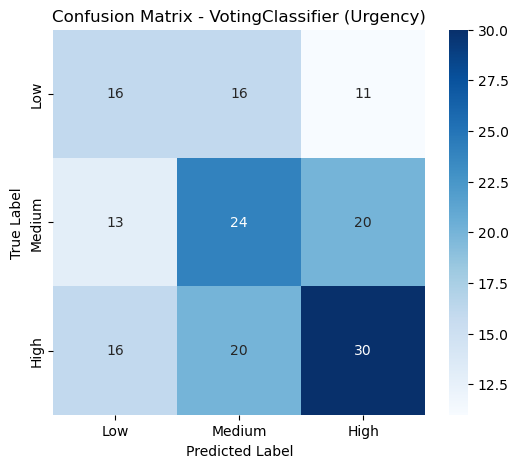

In [63]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
import pandas as pd

# Assuming df_clean has columns: product, issue_type, urgency_level

# Product vs Urgency Level
product_urgency_matrix = pd.crosstab(df_clean['product'], df_clean['urgency_level'], normalize='index') * 100

# Issue Type vs Urgency Level
issue_urgency_matrix = pd.crosstab(df_clean['issue_type'], df_clean['urgency_level'], normalize='index') * 100

print("Product vs Urgency Level (%)")
print(product_urgency_matrix.round(1))

print("\nIssue Type vs Urgency Level (%)")
print(issue_urgency_matrix.round(1))


Product vs Urgency Level (%)
urgency_level      High   Low  Medium
product                              
EcoBreeze AC       40.7  32.6    26.7
FitRun Treadmill   36.6  29.3    34.1
PhotoSnap Cam      32.9  24.7    42.4
PowerMax Battery   33.8  32.5    33.8
ProTab X1          39.3  29.2    31.5
RoboChef Blender   32.0  39.0    29.0
SmartWatch V2      29.5  30.8    39.7
SoundWave 300      32.4  32.4    35.1
UltraClean Vacuum  40.6  20.3    39.1
Vision LED TV      31.3  41.0    27.7

Issue Type vs Urgency Level (%)
urgency_level       High   Low  Medium
issue_type                            
Account Access      31.6  35.3    33.1
Billing Problem     35.2  30.5    34.4
General Inquiry     41.7  28.3    29.9
Installation Issue  31.2  34.4    34.4
Late Delivery       32.0  30.9    37.1
Product Defect      39.1  30.9    30.0
Wrong Item          33.0  29.1    37.9


In [65]:
import pandas as pd

# Product vs Urgency Level (row-normalized percentages)
product_urgency_matrix = pd.crosstab(
    df_clean['product'], 
    df_clean['urgency_level'], 
    normalize='index'
) * 100

print("Product vs Urgency Level (%)")
print(product_urgency_matrix.round(1))


Product vs Urgency Level (%)
urgency_level      High   Low  Medium
product                              
EcoBreeze AC       40.7  32.6    26.7
FitRun Treadmill   36.6  29.3    34.1
PhotoSnap Cam      32.9  24.7    42.4
PowerMax Battery   33.8  32.5    33.8
ProTab X1          39.3  29.2    31.5
RoboChef Blender   32.0  39.0    29.0
SmartWatch V2      29.5  30.8    39.7
SoundWave 300      32.4  32.4    35.1
UltraClean Vacuum  40.6  20.3    39.1
Vision LED TV      31.3  41.0    27.7


In [66]:
# Issue Type vs Urgency Level (row-normalized percentages)
issue_urgency_matrix = pd.crosstab(
    df_clean['issue_type'], 
    df_clean['urgency_level'], 
    normalize='index'
) * 100

print("\nIssue Type vs Urgency Level (%)")
print(issue_urgency_matrix.round(1))



Issue Type vs Urgency Level (%)
urgency_level       High   Low  Medium
issue_type                            
Account Access      31.6  35.3    33.1
Billing Problem     35.2  30.5    34.4
General Inquiry     41.7  28.3    29.9
Installation Issue  31.2  34.4    34.4
Late Delivery       32.0  30.9    37.1
Product Defect      39.1  30.9    30.0
Wrong Item          33.0  29.1    37.9


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[['ticket_text', 'issue_type', 'product']], 
    df_clean['urgency_level'],
    test_size=0.2, stratify=df_clean['urgency_level'], random_state=42
)

# Preprocessor: text → TF-IDF, categorical → OneHot
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, ngram_range=(1,2)), 'ticket_text'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['issue_type', 'product'])
    ]
)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.44      0.47      0.45        58
         Low       0.28      0.23      0.25        52
      Medium       0.38      0.41      0.39        56

    accuracy                           0.37       166
   macro avg       0.36      0.37      0.37       166
weighted avg       0.37      0.37      0.37       166



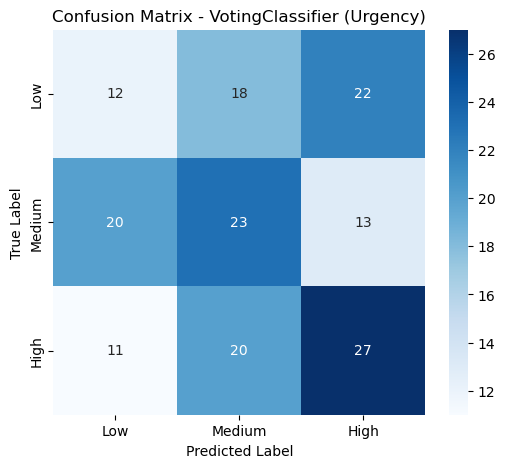

In [68]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [69]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. LOAD DATA
# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_file.csv')

# --- PRE-PROCESSING STEP (CRITICAL) ---
# Drop rows where 'urgency_level' is empty (like Row 2 and 5 in your image)
# You cannot train on missing targets!
df1 = df_clean.dropna(subset=['urgency_level']).copy()

# Fill missing text values to avoid errors
df1['ticket_text'] = df_clean['ticket_text'].fillna('')

# ---------------------------------------------------------
# 2. FEATURE ENGINEERING FUNCTIONS
# ---------------------------------------------------------

def extract_days_late(text):
    """Extracts the number of days mentioned before 'days late'."""
    # Pattern: Look for digits (\d+) followed by whitespace and 'days late'
    match = re.search(r'(\d+)\s+days?\s+late', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return 0

def check_escalation(text):
    """Checks for phrases indicating lack of response."""
    keywords = ['no response', 'contacted support', 'still not here', 'ignoring']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def check_broken_status(text):
    """Checks for words indicating the product failed."""
    keywords = ['stopped working', 'fail', 'broken', 'malfunction', 'error']
    for word in keywords:
        if word in text.lower():
            return 1
    return 0

def get_sentiment(text):
    """Returns a score from -1 (Negative) to 1 (Positive)."""
    return TextBlob(text).sentiment.polarity

# ---------------------------------------------------------
# 3. APPLYING THE FEATURES
# ---------------------------------------------------------

# Apply the functions to create new columns
df1['days_late'] = df1['ticket_text'].apply(extract_days_late)
df1['is_escalated'] = df1['ticket_text'].apply(check_escalation)
df1['is_broken'] = df1['ticket_text'].apply(check_broken_status)
df1['sentiment'] = df1['ticket_text'].apply(get_sentiment)
df1['text_len'] = df1['ticket_text'].apply(len)

# ---------------------------------------------------------
# 4. ENCODING CATEGORICAL DATA
# ---------------------------------------------------------

# One-Hot Encode 'issue_type' and 'product'
# This turns "Billing Problem" into a column [1, 0, 0...]
df_encoded = pd.get_dummies(df1, columns=['issue_type', 'product'], drop_first=True)

# ---------------------------------------------------------
# 5. PREPARING FOR MODELING
# ---------------------------------------------------------

# Define Features (X) and Target (y)
# Drop the original text column and IDs (they aren't needed now that we extracted features)
features_to_drop = ['ticket_id', 'ticket_text', 'urgency_level','sentiment_label']
X = df_encoded.drop(columns=[c for c in features_to_drop if c in df_encoded.columns])
y = df_encoded['urgency_level']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (now with much better features)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Check which features mattered the most (Optional)
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print(coefficients.sort_values(by='Importance', ascending=False).head(5))

              precision    recall  f1-score   support

        High       0.49      0.45      0.47        66
         Low       0.36      0.37      0.36        43
      Medium       0.40      0.42      0.41        57

    accuracy                           0.42       166
   macro avg       0.42      0.42      0.42       166
weighted avg       0.42      0.42      0.42       166

                          Feature  Importance
1                    is_escalated    0.335510
9       issue_type_Product Defect    0.298593
18      product_UltraClean Vacuum    0.260466
6      issue_type_General Inquiry    0.220509
7   issue_type_Installation Issue    0.219453


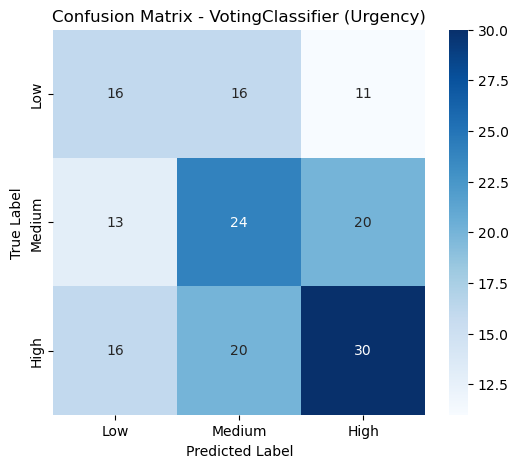

In [70]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=["Low","Medium","High"]) 
plt.figure(figsize=(6,5)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low","Medium","High"], yticklabels=["Low","Medium","High"]) 
plt.title("Confusion Matrix - VotingClassifier (Urgency)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# SVM
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Logistic Regression Report:
               precision    recall  f1-score   support

        High       0.49      0.45      0.47        66
         Low       0.36      0.37      0.36        43
      Medium       0.40      0.42      0.41        57

    accuracy                           0.42       166
   macro avg       0.42      0.42      0.42       166
weighted avg       0.42      0.42      0.42       166

Confusion Matrix:
 [[30 16 20]
 [11 16 16]
 [20 13 24]]
Random Forest Report:
               precision    recall  f1-score   support

        High       0.35      0.24      0.29        66
         Low       0.32      0.44      0.37        43
      Medium       0.28      0.30      0.29        57

    accuracy                           0.31       166
   macro avg       0.32      0.33      0.32       166
weighted avg       0.32      0.31      0.31       166

Confusion Matrix:
 [[16 20 30]
 [10 19 14]
 [20 20 17]]
SVM Report:
               precision    recall  f1-score   support

      